# Exploratory Data Analysis

Here will will explore various views of our Yelp_Api data in order to discover insights about our two food types in each region.

To begin, we import the CSV file we saved from the previous yelp_api script.

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv("yelp_master_data.csv")

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.category.value_counts().plot(kind='bar')
plt.title('Total Restaurants In the Survey')

In [ ]:
df[(df.city =='chicago') & (df.category == 'vegan')].price.sum()/df[(df.city =='chicago') & (df.category == 'vegan')]['Unnamed: 0'].max()



In [ ]:
df[(df.city =='minneapolis') & (df.category == 'steak')].price.sum()/df[(df.city =='minneapolis') & (df.category == 'steak')]['Unnamed: 0'].max()




In [ ]:
df[(df.city =='chicago') & (df.category == 'vegan')].price.sum()

In [ ]:
sns.distplot(df[(df.city =='chicago') & (df.category == 'steak')].price, hist=True)
sns.distplot(df[(df.city =='chicago') & (df.category == 'vegan')].price, hist=True)

# Summary Analysis

We create a new DataFrame with just summary statistics to allow us to see quick comparisons by city.

### Population of matching 40km radius

In [59]:
pop = {'Portland':1907395, 
'Los Angeles':10055380, 
'New York City':13409590, 
'Boston':3342667, 
'Chicago':6377851, 
'Austin':1142575, 
'Miami':3140501, 
'Tulsa':757571, 
'Minneapolis':2648228, 
'San Diego':2684215,
'san francisco': 5027241}

In [60]:
# creating a new dataframed named cities_df
cities = ['portland','los angeles','new york','boston','chicago','austin','miami','tulsa','minneapolis','san diego','san francisco']


In [61]:
def get_number_of_restaurants(city,restaurant_type):
    return df.loc[(df['city'] == city) & (df['category'] == restaurant_type)].shape[0]

In [62]:
# create a function that sums price per city per category: vegan, steak
def get_sum(city,restaurant_type):
    return df.loc[(df['city'] == city) & (df['category'] == restaurant_type)].price.sum()

In [96]:
cities_df = pd.DataFrame({'city':cities},)

#adding vegan_count column to cities_df dataframe
cities_df['veg_count'] = cities_df['city'].map(lambda x :get_number_of_restaurants(x,'vegan') )

#adding steak_count column to cities_df dataframe
cities_df['steak_count'] = cities_df['city'].map(lambda x :get_number_of_restaurants(x,'steak') )

# adding a population column to cities_df dataframe
cities_df['pop'] = [float(x) for x in list(pop.values())]

# adding a per capita column to cities_df dataframe to give steak restaurants per capita per city
cities_df['steak_capita'] = cities_df['steak_count'] / cities_df['pop']
cities_df['veg_capita'] = cities_df['veg_count'] / cities_df['pop']

cities_df['steak_rating_mean'] = cities_df['city'].map(lambda x :get_sum(x,'steak') )/cities_df['steak_count']
cities_df['veg_rating_mean'] = cities_df['city'].map(lambda x :get_sum(x,'vegan') )/ cities_df['veg_count']

# adding price sum column per city for steak restaurants
cities_df['steak_$mean'] = cities_df['city'].map(lambda x :get_sum(x,'steak') )/ cities_df['steak_count']
cities_df['veg_$mean'] = cities_df['city'].map(lambda x :get_sum(x,'vegan') )/ cities_df['veg_count']


# adding longitude and latitude to cities_df dataframe


#setting the index to the city
cities_df.set_index('city', drop=True, inplace=True)

In [97]:
cities_df

,veg_count,steak_count,pop,steak_capita,veg_capita,steak_rating_mean,veg_rating_mean,steak_$mean,veg_$mean
city,,,,,,,,,
portland,102,30,1907395.0,0.000016,0.000053,2.551724,1.505747,2.551724,1.505747
los angeles,137,68,10055380.0,0.000007,0.000014,2.758065,1.678261,2.758065,1.678261
new york,238,243,13409590.0,0.000018,0.000018,2.853333,1.905941,2.853333,1.905941
boston,36,47,3342667.0,0.000014,0.000011,2.613636,1.750000,2.613636,1.750000
chicago,56,97,6377851.0,0.000015,0.000009,2.802198,1.607843,2.802198,1.607843
austin,53,31,1142575.0,0.000027,0.000046,2.700000,1.534884,2.700000,1.534884
miami,32,73,3140501.0,0.000023,0.000010,2.303030,1.720000,2.303030,1.720000
tulsa,5,33,757571.0,0.000044,0.000007,2.366667,1.333333,2.366667,1.333333
minneapolis,16,27,2648228.0,0.000010,0.000006,2.680000,1.727273,2.680000,1.727273


In [65]:
#cities_df.to_csv('summary.csv')

In [66]:
cities_df = pd.DataFrame.from_dict(pop, orient='index')

In [93]:
start_point={'new york':(40.70544486444615, -73.99429321289062),
'chicago':(41.90515925618311, -87.67776489257812),
'portland':(45.515785397030584, -122.65411376953125),
'san francisco':(37.76089938976322, -122.43644714355469),
'los angeles':(34.0615895441259, -118.32138061523438),
'boston':(42.34784169448538, -71.07124328613281),
'austin':(30.305156315977833, -97.75772094726562),
'miami':(25.752753731496888, -80.2880859375),
'san diego':(32.790569394537286, -117.15408325195312),
'tulsa':(36.10220015729658, -95.9271240234375),
'minneapolis':(44.96558443188442, -93.2904052734375)}

In [105]:
sns.set(color_codes=True)


<IPython.core.display.Javascript object>


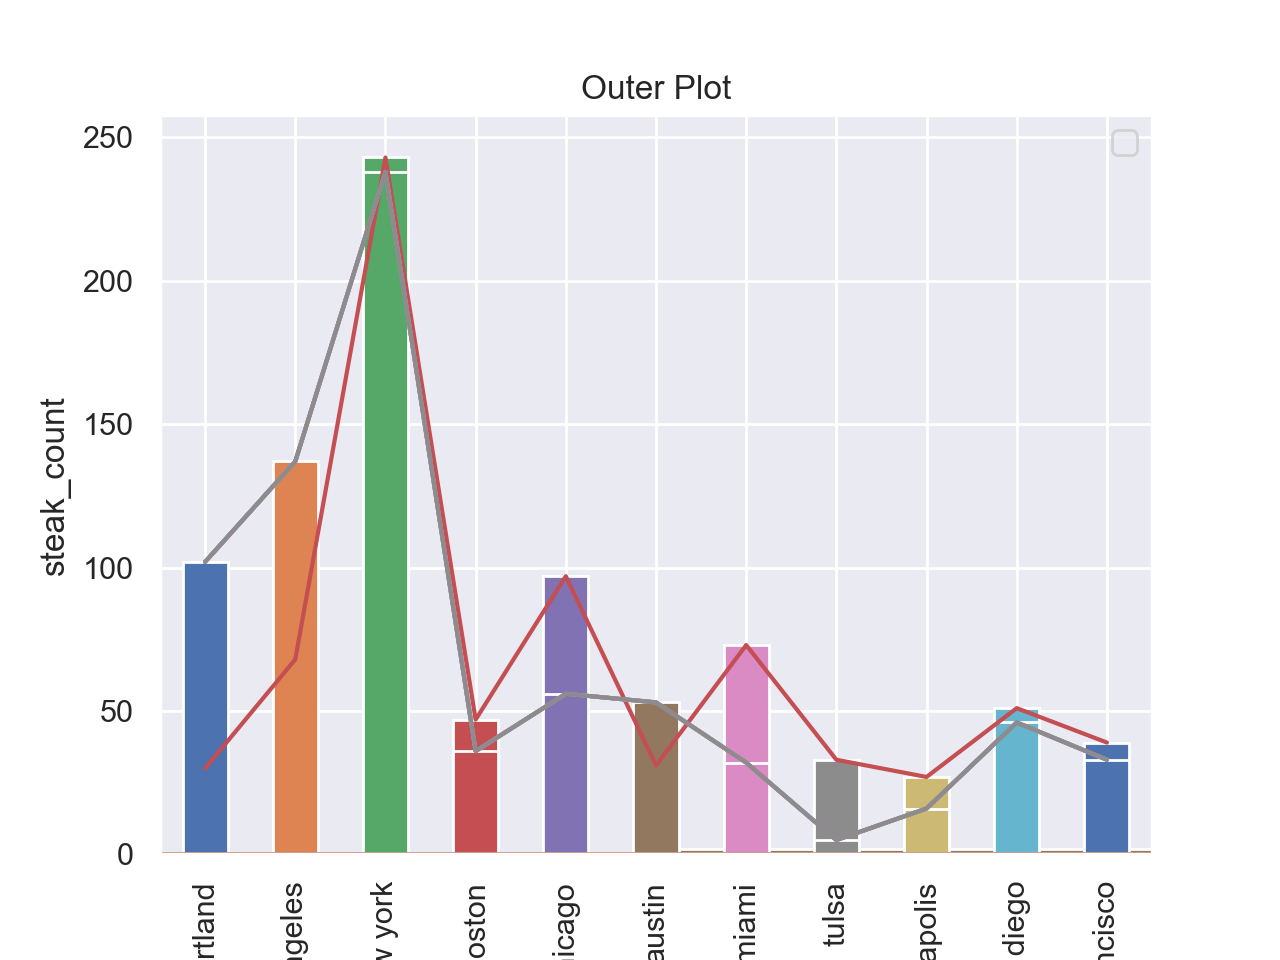

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


In [129]:
sns.distplot(cities_df.iloc[:,0])
sns.distplot(cities_df.iloc[:,1])
plt.legend()

<IPython.core.display.Javascript object>


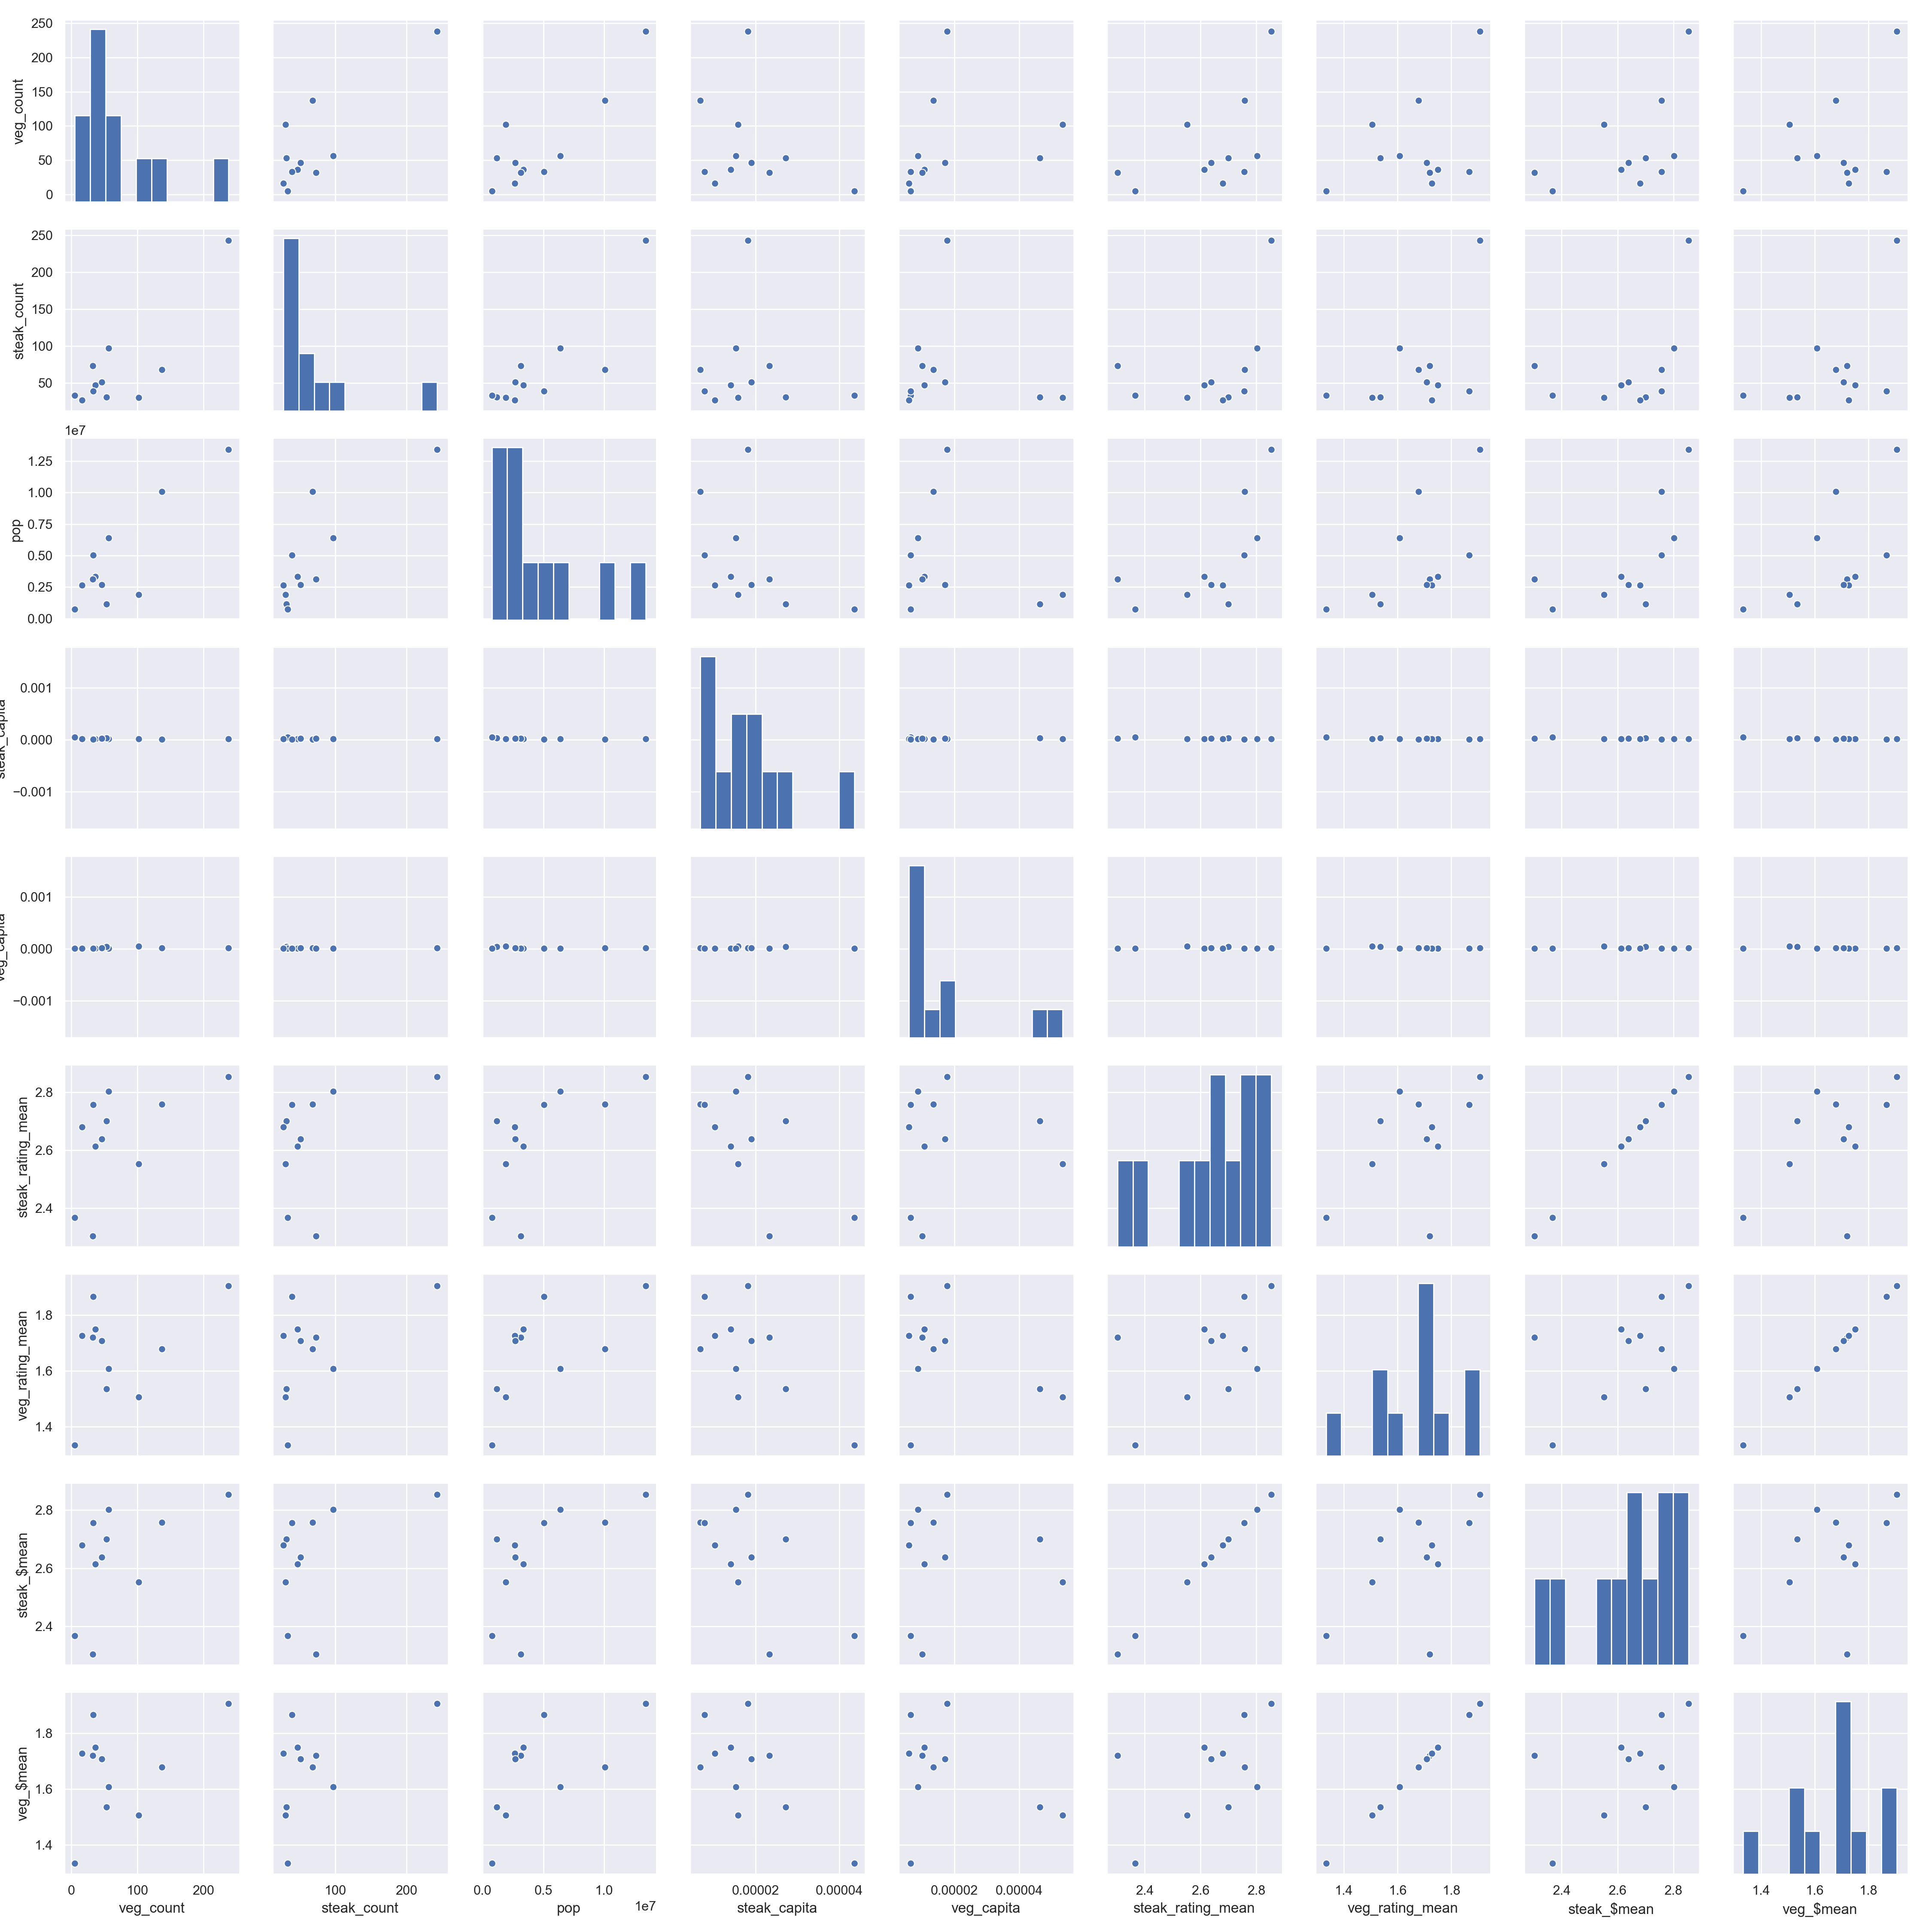

In [133]:
sns.pairplot(cities_df);

In [158]:
cities_df

,veg_count,steak_count,pop,steak_capita,veg_capita,steak_rating_mean,veg_rating_mean,steak_$mean,veg_$mean
city,,,,,,,,,
portland,102,30,1907395.0,0.000016,0.000053,2.551724,1.505747,2.551724,1.505747
los angeles,137,68,10055380.0,0.000007,0.000014,2.758065,1.678261,2.758065,1.678261
new york,238,243,13409590.0,0.000018,0.000018,2.853333,1.905941,2.853333,1.905941
boston,36,47,3342667.0,0.000014,0.000011,2.613636,1.750000,2.613636,1.750000
chicago,56,97,6377851.0,0.000015,0.000009,2.802198,1.607843,2.802198,1.607843
austin,53,31,1142575.0,0.000027,0.000046,2.700000,1.534884,2.700000,1.534884
miami,32,73,3140501.0,0.000023,0.000010,2.303030,1.720000,2.303030,1.720000
tulsa,5,33,757571.0,0.000044,0.000007,2.366667,1.333333,2.366667,1.333333
minneapolis,16,27,2648228.0,0.000010,0.000006,2.680000,1.727273,2.680000,1.727273


<IPython.core.display.Javascript object>


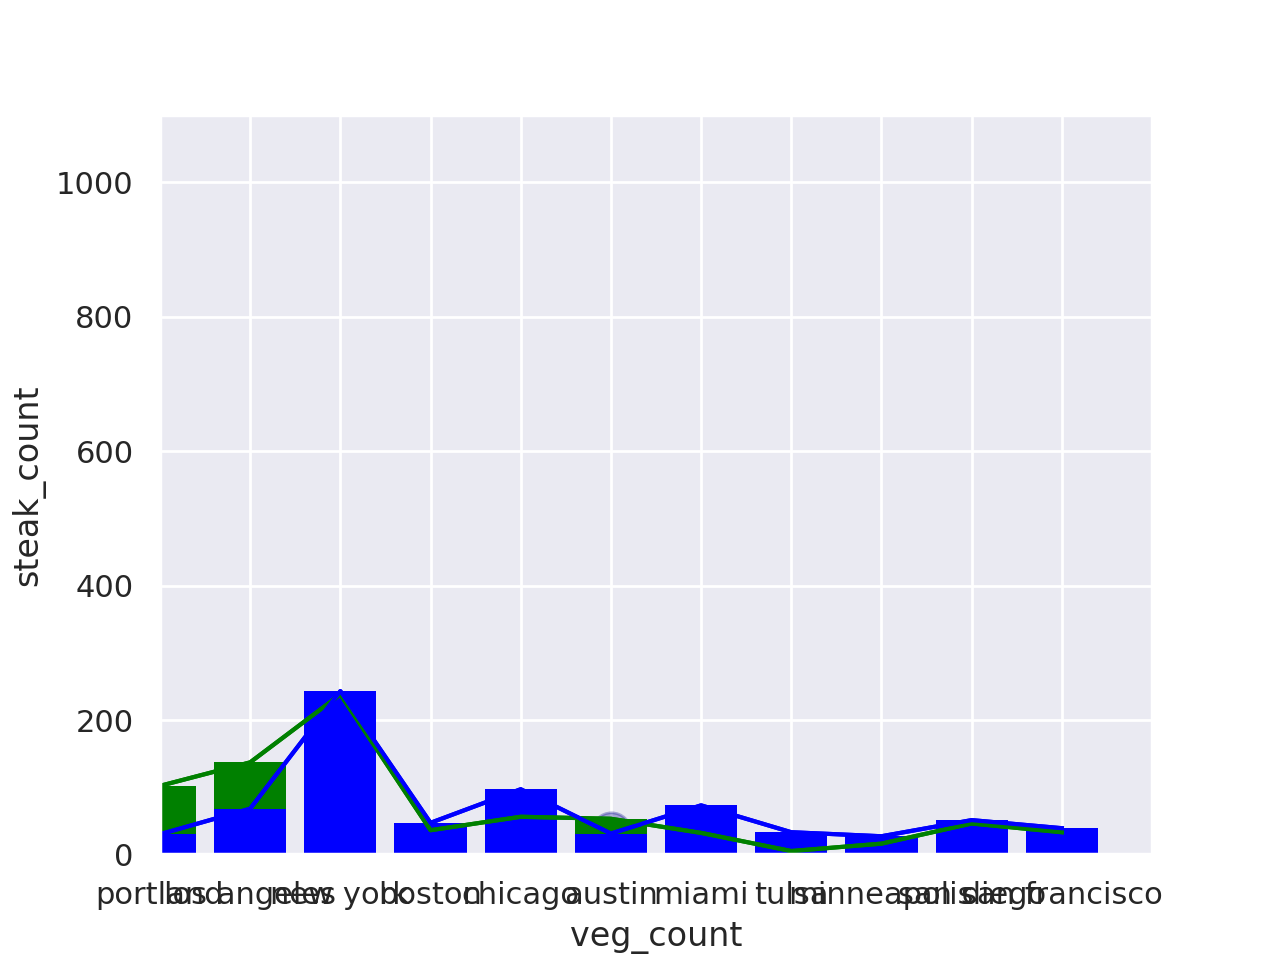

In [183]:
sns.regplot(x=cities_df["veg_count"], 
            y=cities_df["steak_count"], 
            fit_reg=False, 
            scatter_kws={"color":"darkblue",
                         "alpha":0.3,
                         "s":200} )
plt.show()

In [175]:
x=cities_df['veg_count']


In [242]:
x_vals = cities_df.index
veg = cities_df['veg_count']
steak = cities_df['steak_count']

plt.plot(x_vals, veg,
        color='green')
plt.plot(x_vals, performance2,
        color='blue')


#ax.legend()

plt.show()

pandas.core.series.Series

In [ ]:
pop = {'Portland':1907395, 
'Los Angeles':10055380, 
'New York City':13409590, 
'Boston':3342667, 
'Chicago':6377851, 
'Austin':1142575, 
'miami':3140501, 
'tulsa':757571, 
'Minneapolis':2648228, 
'San Diego':2684215}

two sample Z test